In [1]:
from cytograph import Algorithm, creates, requires, div0
from cytograph.visualization.scatter import scatterc, scattern
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from typing import List
import shoji
import cytograph as cg
import cytograph.visualization as cgplot
import collections
from typing import List, Optional
import matplotlib.patheffects as PathEffects
import fastcluster
import igraph
import leidenalg as la
import scipy.cluster.hierarchy as hc
from hmmlearn import hmm
from openTSNE import TSNE
from pynndescent import NNDescent
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from tqdm import trange
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
from cytograph.visualization import Colorizer
from matplotlib.lines import Line2D
import scipy as sci
import scanpy as sc

In [2]:
db = shoji.connect()

In [3]:
ws = db.builds.jesper.GBM_all.SL057_filtered

In [5]:
adata = ws.create_anndata()

In [6]:
adata.var = adata.var.set_index('Gene')

In [7]:
adata.var.index = adata.var.index.astype('object')

In [8]:
adata.var_names_make_unique()

In [9]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata, base=2)

In [12]:
celltype = ['Tumor', 'TAM', 'Oligodendrocytes']

                                      Tumor


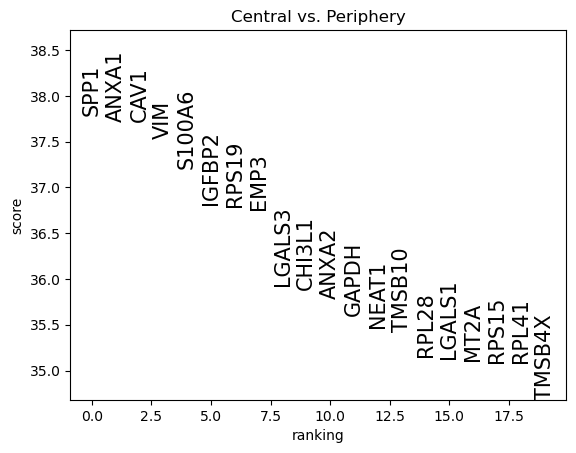

                                      TAM


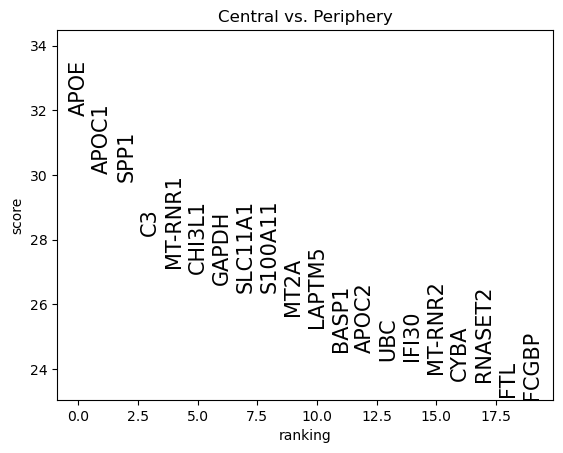

                                      Oligodendrocytes


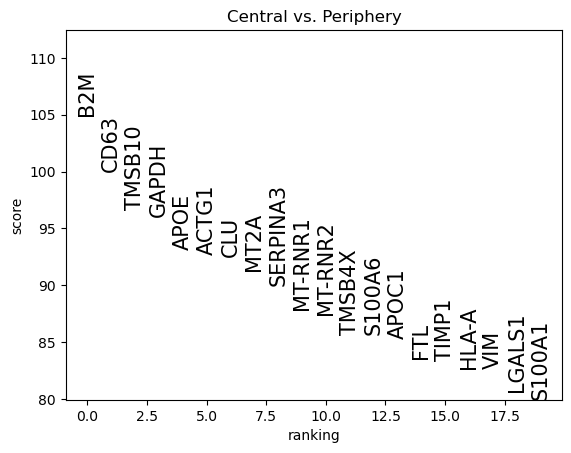

In [13]:
for cell in celltype:
    cells = adata[adata.obs['ManualAnnotationSL057_TAM'] == cell,:]
    unique_samples = []
    Su = np.sum(ws.ManualAnnotationSL057_TAM[ws.Zone[:] == 'Central'] == cell)
    if Su > 0:
        sc.tl.rank_genes_groups(cells, 'Zone', groups=['Central'], reference='Periphery', method="wilcoxon")
        print('                                      ' + cell)
        sc.pl.rank_genes_groups(cells, groups=['Central'], n_genes=20, fontsize=15) 

In [14]:
samp = 'Central'

In [15]:
MES1 = np.array(["CHI3L1","ANXA2","ANXA1","CD44","VIM","MT2A","C1S","NAMPT","EFEMP1","C1R","SOD2","IFITM3","TIMP1","SPP1","A2M","S100A11","MT1X","S100A10","FN1","LGALS1","S100A16","CLIC1","MGST1","RCAN1","TAGLN2","NPC2","SERPING1","TCIM","EMP1","APOE","CTSB","C3","LGALS3","MT1E","EMP3","SERPINA3","ACTN1","PRDX6","IGFBP7","SERPINE1","PLP2","MGP","CLIC4","GFPT2","GSN","NNMT","TUBA1C","GJA1","TNFRSF1A","WWTR1"])
MES2 = np.array(["HILPDA","ADM","DDIT3","NDRG1","HERPUD1","DNAJB9","TRIB3","ENO2","AKAP12","SQSTM1","MT1X","ATF3","NAMPT","NRN1","SLC2A1","BNIP3","LGALS3","INSIG2","IGFBP3","PPP1R15A","VIM","PLOD2","GBE1","SLC2A3","FTL","WARS1","ERO1A","XPOT","HSPA5","GDF15","ANXA2","EPAS1","LDHA","P4HA1","SERTAD1","PFKP","PGK1","EGLN3","SLC6A6","CA9","BNIP3L","RPL21","TRAM1","UFM1","ASNS","GOLT1B","ANGPTL4","SLC39A14","CDKN1A","HSPA9"])
gene_list = np.concatenate((MES1, MES2))
_, i = np.unique(gene_list, return_index=True)
gene_list = gene_list[np.sort(i)]
gene_list

array(['CHI3L1', 'ANXA2', 'ANXA1', 'CD44', 'VIM', 'MT2A', 'C1S', 'NAMPT',
       'EFEMP1', 'C1R', 'SOD2', 'IFITM3', 'TIMP1', 'SPP1', 'A2M',
       'S100A11', 'MT1X', 'S100A10', 'FN1', 'LGALS1', 'S100A16', 'CLIC1',
       'MGST1', 'RCAN1', 'TAGLN2', 'NPC2', 'SERPING1', 'TCIM', 'EMP1',
       'APOE', 'CTSB', 'C3', 'LGALS3', 'MT1E', 'EMP3', 'SERPINA3',
       'ACTN1', 'PRDX6', 'IGFBP7', 'SERPINE1', 'PLP2', 'MGP', 'CLIC4',
       'GFPT2', 'GSN', 'NNMT', 'TUBA1C', 'GJA1', 'TNFRSF1A', 'WWTR1',
       'HILPDA', 'ADM', 'DDIT3', 'NDRG1', 'HERPUD1', 'DNAJB9', 'TRIB3',
       'ENO2', 'AKAP12', 'SQSTM1', 'ATF3', 'NRN1', 'SLC2A1', 'BNIP3',
       'INSIG2', 'IGFBP3', 'PPP1R15A', 'PLOD2', 'GBE1', 'SLC2A3', 'FTL',
       'WARS1', 'ERO1A', 'XPOT', 'HSPA5', 'GDF15', 'EPAS1', 'LDHA',
       'P4HA1', 'SERTAD1', 'PFKP', 'PGK1', 'EGLN3', 'SLC6A6', 'CA9',
       'BNIP3L', 'RPL21', 'TRAM1', 'UFM1', 'ASNS', 'GOLT1B', 'ANGPTL4',
       'SLC39A14', 'CDKN1A', 'HSPA9'], dtype='<U8')

In [20]:
ws.Zone[:]

array(['Central', 'Central', 'Central', ..., 'Periphery', 'Periphery',
       'Periphery'], dtype=object)

Exception ignored in: <function Future.__del__ at 0x149b36f81cf0>
Traceback (most recent call last):
  File "/home/jesper/anaconda3/lib/python3.10/site-packages/fdb/impl.py", line 607, in __del__
    if self.fpointer:
AttributeError: 'Value' object has no attribute 'fpointer'


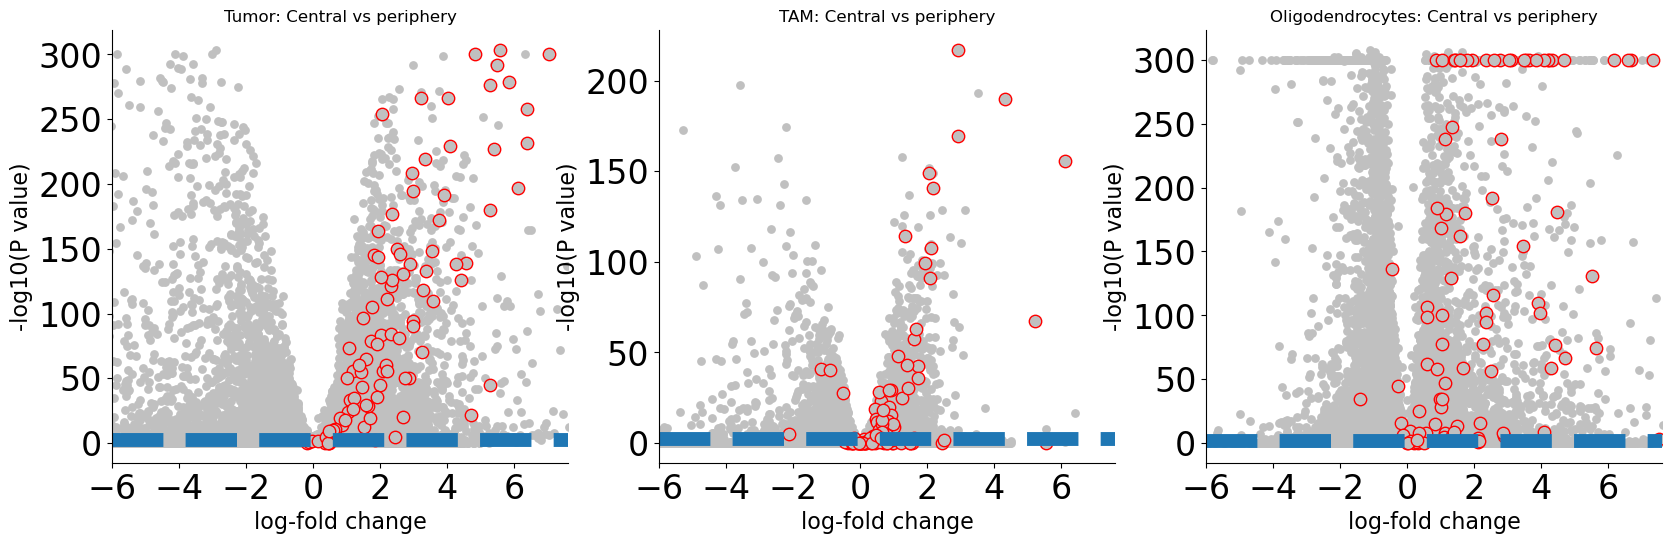

In [22]:
plt.figure(None, (20, 100))
gs = plt.GridSpec(15, 3)
i = 0
for cell in celltype:
    cells = adata[adata.obs['ManualAnnotationSL057_TAM'] == cell,:]
    sc.tl.rank_genes_groups(cells, 'Zone', groups=['Central'], reference='Periphery', method="wilcoxon")
    gene_rank = sc.get.rank_genes_groups_df(cells, group='Central')[['names','logfoldchanges','pvals', 'pvals_adj']]
    ax = plt.subplot(gs[i])
    x = gene_rank['logfoldchanges']
    y = np.copy(gene_rank['pvals_adj'])
                # setting to less than 1e-300 makes np.log10 inf
    y[y == 0] = 1e-300
    y = -np.log10(y)
    plt.scatter(x, y, s=40, lw=0, color='silver')
    plt.hlines(-np.log10(1e-2), -6, 7.6, linestyles='dashed', lw=10)
                #for g in ['HES1', 'IRX5', 'LHX2', 'NELL1', 'PAX3']:
    for g in gene_list:
        ix = gene_rank['names'] == g
        plt.scatter(x[ix], y[ix], s=80, lw=1, color='silver', edgecolors='r')
                    #plt.text(x[ix], y[ix], g, fontsize=8, rotation=30, clip_on=True)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    plt.xlim(-6, 7.6)
    plt.ylabel("-log10(P value)",fontsize=16)
    plt.xlabel("log-fold change", fontsize=16)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.title(cell + ": " + samp + ' vs periphery')
    i += 1
        #plt.savefig("/proj/cytograph/jesper/Figures/Suppl/Volcano_" + celltype + "_Central_57.pdf",dpi=300, bbox_inches="tight")